# Python Correlation


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) #Adjust the configuration of plots when we create

In [9]:
df=pd.read_csv("movies.csv")

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# lets see if there is any missing data
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [20]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
# Change Datatype of the Columns
df['budget'] = df['budget'].fillna(0).astype('int')

df['gross'] = df['gross'].fillna(0).astype('int')

In [27]:
df['budget']

0       19000000
1        4500000
2       18000000
3        3500000
4        6000000
          ...   
7663        7000
7664           0
7665       58750
7666       15000
7667           0
Name: budget, Length: 7668, dtype: int32

In [67]:
    #create Correct year column
    
    df['released'] =df['released'].astype('string')
    df['yearcorrect']= df['released'].str.extract(r'(\d{4})')
    
    df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year1
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1705,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1492,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1771,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1492,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1543,0


In [72]:
df.sort_values(by=['gross'],inplace=False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year1
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,<NA>,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,<NA>,38
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,1488,39
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,1704,35
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,2472,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,3372,3,6,2006,2392,6.3,12000.0,1563,2397,788,55,1000000,0,396,77.0,2392,27
7667,5394,-1,10,2020,391,5.7,7.0,2165,3344,2463,44,0,0,1787,102.0,<NA>,40
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,-2147483648,2253,194.0,<NA>,17
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,-2147483648,1606,181.0,<NA>,39


In [71]:
pd.set_option('display.max_rows',10)

In [66]:
# Drop any Duplicate Values
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year1
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1705,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1492,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1771,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1492,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1543,0


Text(0, 0.5, 'Budget for Film')

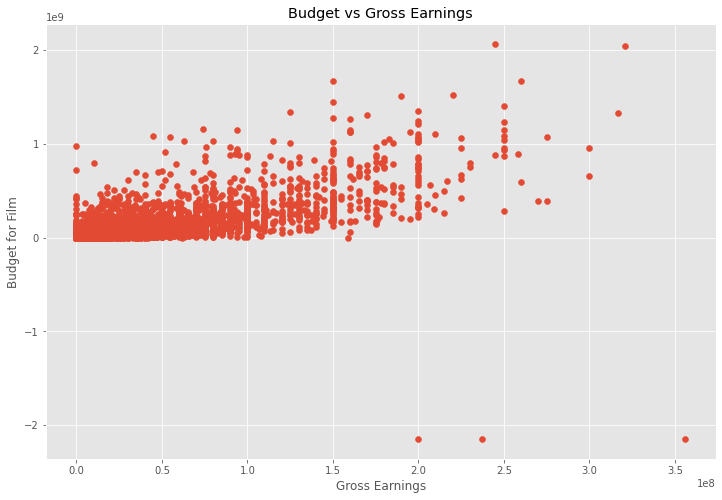

In [65]:
#Scatter Plot with Budget vs Gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel('Budget for Film')


<AxesSubplot:xlabel='budget', ylabel='gross'>

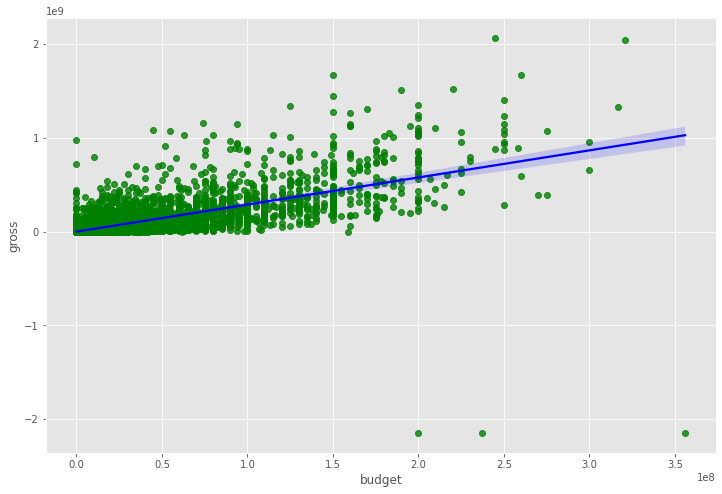

In [45]:
#Plotting Budget vs gross using Seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color": "green"}, line_kws= {"color" : "blue"})


In [46]:
#lets start looking at Correlation
df.corr()

C:\Users\Admin\AppData\Local\Temp/ipykernel_5844/1886787944.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


In [47]:
#from this we can know that, there is a high corelation between the budget and gross

C:\Users\Admin\AppData\Local\Temp/ipykernel_5844/2019294739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


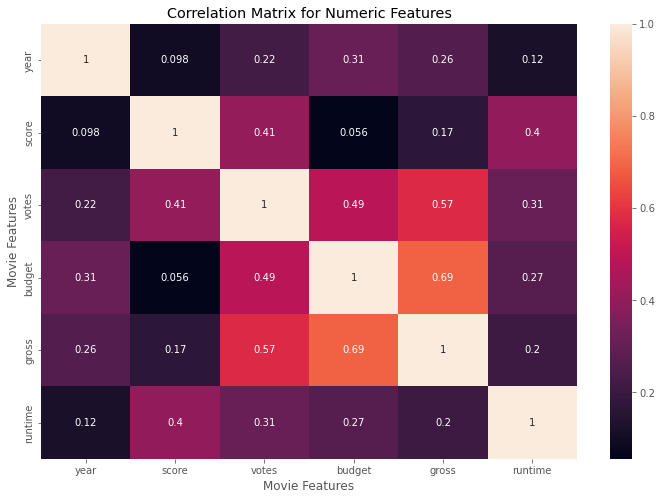

In [49]:
#now lets put this in heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [68]:
df_numerized= df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year1
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1705,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1492,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1771,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1492,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1543,0


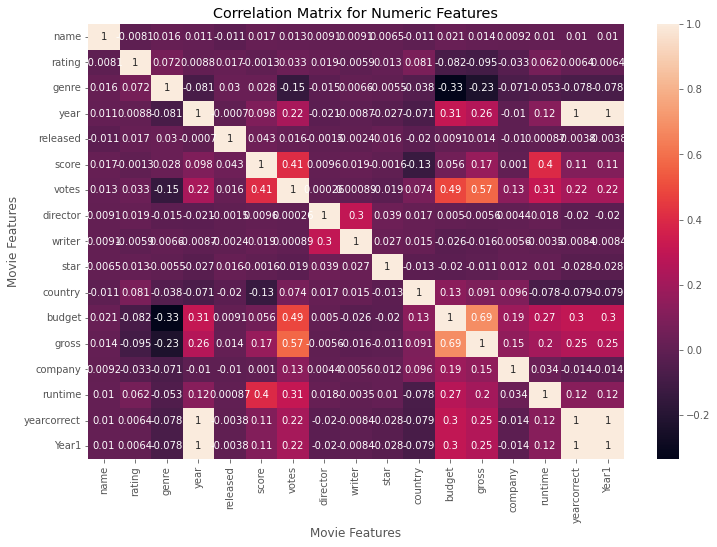

In [52]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [54]:
#now lets see unstacked
corr_pairs= df_numerized.corr().unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.013895
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
             Year1          0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
 

In [55]:
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.229534
gross        genre         -0.229534
genre        votes         -0.145307
votes        genre         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.095355
gross        rating        -0.095355
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
             Year1         -0.079009
yearcorrect  country       -0.079009
Year1        country       -0.079009
country      runtime       -0.078412
runtime      country       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             Year1         -0.078210
Year1        genre         -0.078210
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
c

In [57]:
 high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes        gross          0.573889
gross        votes          0.573889
budget       gross          0.687124
gross        budget         0.687124
year         Year1          0.996397
Year1        year           0.996397
year         yearcorrect    0.996397
yearcorrect  year           0.996397
name         name           1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
yearcorrect  Year1          1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
Year1        yearcorrect    1.000000
             Year1          1.000000
d

In [ ]:
#votes and gross have the highest corelation. 